# Números Aleatorios

In [6]:
import math as mt
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
import time

N = 1000
Xn = time.time()
Xn_2 = time.time()*1000
        
def cong_mixto(N):
    global Xn
    r_lis = []
    a = 25214903917
    m = (2**48)-1
    for _ in range(0,N):
        Xn = (a*Xn + 1) % m
        Un = Xn/m
        r_lis.append(Un)
        
    return r_lis

def cong_mixto_2(N):
    global Xn_2
    r_lis = []
    a = 1103515245
    m = 2**31
    for _ in range(0,N):
        Xn_2 = (a*Xn_2 + 1) % m
        Un = Xn_2/m
        r_lis.append(Un)
        
    return r_lis

## Constraste o prueba de Kolmogorov-Smirnov

c:\miniconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


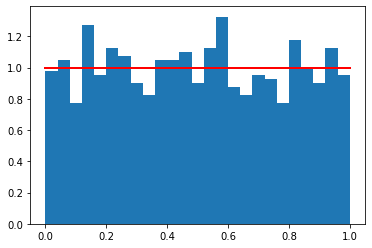

In [7]:
import numpy as np
from random import random
# Teoretical CDF for Uniform distribution F(x)
# Gerate random numbers with Uniform distribution f(x)
x = np.random.uniform(0,1,N)

# Plot empirical distribution f(x)
count, bins, ignored = plt.hist(x, 25, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [8]:
def cmp(x, u):
    global N
    x1 = np.arange(1/N,1+1/N,1/N)
    y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

    x2 = np.sort(x)
    y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))

    De=np.absolute(y2-y1)
    print("De =",np.max(De))
    D,pvalue = stats.kstest(y2, 'uniform')
    print("KS test de python D =", D)

    # Plotting
    plt.plot(x1,y1,label='Uniform')
    plt.step(x2,y2,label='Random')
    x3 = [x1[De.argmax()],x1[De.argmax()]]
    y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
    
    plt.step(x3,y3,label='D')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Cumulative Probability P(X)')
    plt.ylim(0, 1.05)
    plt.show()

Generador congruencial mixto:


c:\miniconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


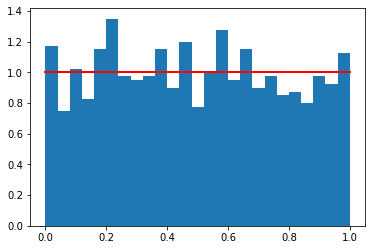

De = 0.25140671754282673
KS test de python D = 0.2514067175428264


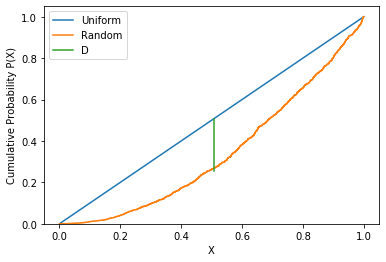

Generador de numpy:


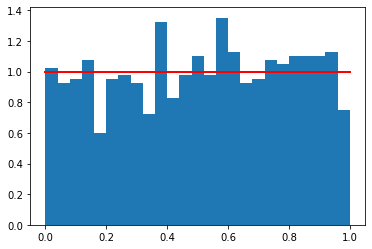

De = 0.2389181532379305
KS test de python D = 0.23891815323793011


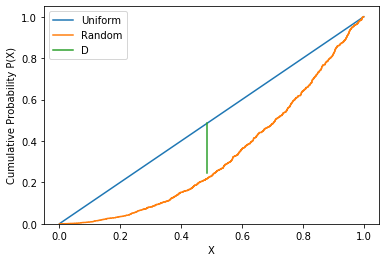

In [9]:
def ks_test(x):
    global N
    u = [1.0] * N

    
    count, bins, ignored = plt.hist(x, 25, normed=True)
    plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
    plt.show()
    cmp(x, u)

print("Generador congruencial mixto:")
ks_test(cong_mixto_2(N))
print("Generador de numpy:")
ks_test(np.random.uniform(0,1,N))

## Contraste o prueba $\chi^{2}$

c:\miniconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


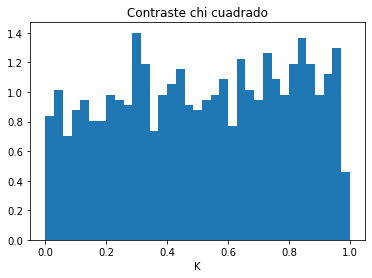

Chi cuadrado = 931.1965406784309


In [10]:
def contraste_chi_cuadrado(random):
    global N
    k = 35
    ez = N/k
    chi = 0
    
    p, spaces, fig = plt.hist(random, k, normed=True)
    plt.xlabel('K')
    plt.title('Contraste chi cuadrado')
    plt.show()
    
    for z in range(k):
        chi = chi + ((p[z] - ez) ** 2) / ez
    
    print("Chi cuadrado =", chi)

contraste_chi_cuadrado(cong_mixto(N))

## Constraste o prueba de rachas

In [11]:

def rachas_test(random):
    rachas = []
    
    for i in range(1, N):
        #Identificador de el tipo de rachas
        c = 0
        if random[i-1] < random[i]:
            c = 1
        rachas.append(c)
    
    r_i, intervalos, fig = plt.hist(rachas, 2, normed=True)
    plt.title('Cantidad de Rachas')
    plt.clf()
    
    #Número inicial de rachas
    R = 1
    aux = rachas[0]
    
    for i in range(1, len(rachas)):
        if rachas[i] != aux:
            R = R + 1
            aux = rachas[i]
            
    n = len(random)
    Z = (R - (2*n - 1)/3) / (mt.sqrt((16*n - 29) / 90))
    print(" ")
    print("Resultados test de rachas:")
    print("Número de rachas =", R)
    print("Estadístico Z =", Z)

rachas_test(cong_mixto(N))

c:\miniconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


 
Resultados test de rachas:
Número de rachas = 669
Estadístico Z = 0.20018149675945368


<Figure size 432x288 with 0 Axes>

# solucion 

### RANDU $x_{i+1}=65539 x_i \mod 2^{31}$

c:\miniconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


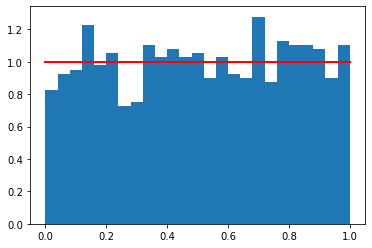

De = 0.24426333417355411
KS test de python D = 0.24426333417355373


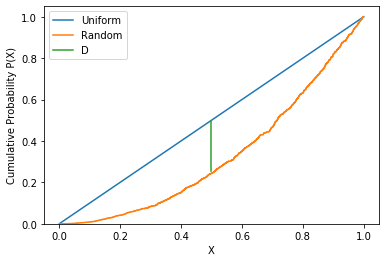

c:\miniconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


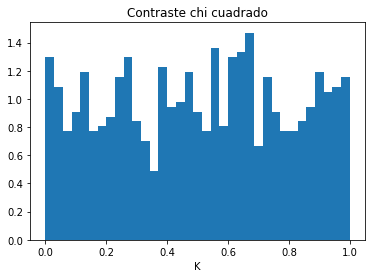

Chi cuadrado = 931.2632653077507
 
Resultados test de rachas:
Número de rachas = 701
Estadístico Z = 2.602359457872932
----------------------------------


c:\miniconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


<Figure size 432x288 with 0 Axes>

In [12]:
def Randu(N):
    global Xn
    r_lis = []
    a = 65539
    m = 2**31
    
    for _ in range(0,N):
        Xn = (a*Xn + 0) % m
        Un = Xn/m
        r_lis.append(Un)
        
    return r_lis

#Uniformidad
ks_test(Randu(N))
contraste_chi_cuadrado(Randu(N))

#Aleatoriedad
rachas_test(Randu(N))
print("----------------------------------")

### Sinclair ZX81 $x_{i+1}=75 x_i \mod (2^{16}+1)$

c:\miniconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


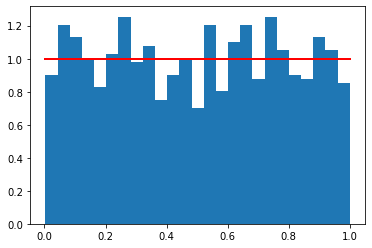

De = 0.2528200207703961
KS test de python D = 0.2528200207703957


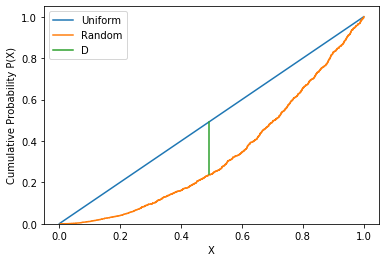

c:\miniconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


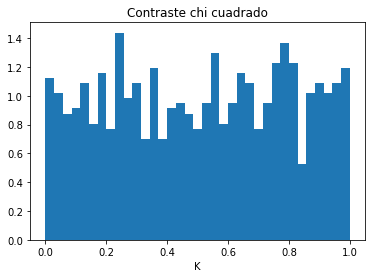

Chi cuadrado = 931.0979704660067
 
Resultados test de rachas:
Número de rachas = 644
Estadístico Z = -1.6765200353604512
----------------------------------


c:\miniconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


<Figure size 432x288 with 0 Axes>

In [13]:
def Sinclair(N):
    global Xn
    r_lis = []
    a = 75
    m = 2**16 + 1
    
    for _ in range(0,N):
        Xn = (a*Xn + 0) % m
        Un = Xn/m
        r_lis.append(Un)
        
    return r_lis

#Uniformidad
ks_test(Sinclair(N))
contraste_chi_cuadrado(Sinclair(N))

#Aleatoriedad
rachas_test(Sinclair(N))
print("----------------------------------")

### Numerical recipes $x_{i+1}= 1664525 x_i + 1013904223 \mod 2^{32}$

c:\miniconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


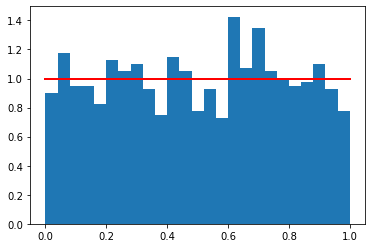

De = 0.24789983948810357
KS test de python D = 0.24789983948810318


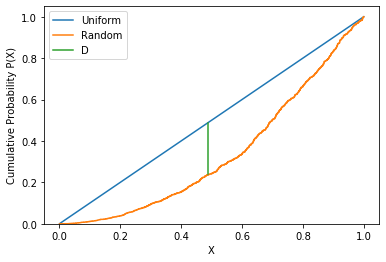

c:\miniconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


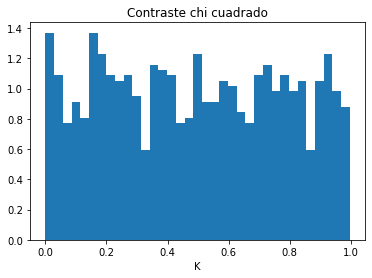

Chi cuadrado = 931.0579633112851
 
Resultados test de rachas:
Número de rachas = 661
Estadístico Z = -0.4003629935189159
----------------------------------


c:\miniconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


<Figure size 432x288 with 0 Axes>

In [14]:

def n_recipes(N):
    global Xn
    r_lis = []
    a = 1664525
    m = 2**32
    
    for _ in range(0,N):
        Xn = (a*Xn + 1013904223) % m
        Un = Xn/m
        r_lis.append(Un)
        
    return r_lis

#Uniformidad
ks_test(n_recipes(N))
contraste_chi_cuadrado(n_recipes(N))

#Aleatoriedad
rachas_test(n_recipes(N))
print("----------------------------------")

### Borland C/C++ $x_{i+1}= 22695477 x_i + 1 \mod 2^{32}$

c:\miniconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


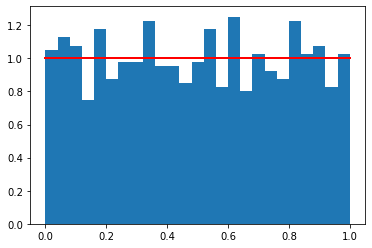

De = 0.25236042552981486
KS test de python D = 0.25236042552981447


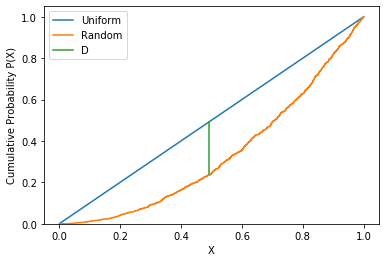

c:\miniconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


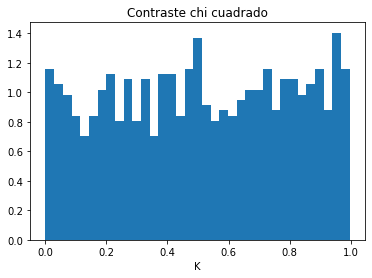

Chi cuadrado = 931.0599074364188
 
Resultados test de rachas:
Número de rachas = 670
Estadístico Z = 0.2752495580442499
----------------------------------


c:\miniconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


<Figure size 432x288 with 0 Axes>

In [15]:
def Borland(N):
    global Xn
    r_lis = []
    a = 22695477
    m = 2**32
    
    for _ in range(0,N):
        Xn = (a*Xn + 1) % m
        Un = Xn/m
        r_lis.append(Un)
        
    return r_lis

#Uniformidad
ks_test(Borland(N))
contraste_chi_cuadrado(Borland(N))

#Aleatoriedad
rachas_test(Borland(N))
print("----------------------------------")